In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import os
import cv2

In [14]:
color_blue_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"
color_lime = 'lime'
color_green = 'forestgreen'
color_blue = "#1a559e"


In [ ]:

# Generate some data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create a directory for images
os.makedirs("kmeans_images", exist_ok=True)

# Define a custom colormap using existing colors
custom_colors = [color_blue_light, color_pink, color_gold, color_green, color_orange, 
                 color_blue, color_red, color_lime, color_black]

words = ['a','b']
# Generate images for each k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(8, 6))
    
    # Use custom colors for the scatter plot
    for i in range(k):
        cluster_points = X[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, 
                    color=custom_colors[i % len(custom_colors)], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
    plt.title(f"K-means Clustering con k={k}")
    letter = 'a' if k <10 else 'b'
    plt.savefig(f"kmeans_images/kmeans_k-{letter}-{k}.png")
    plt.close()

# Video creation
image_folder = 'kmeans_images'
video_name = 'kmeans_clustering.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 0.33, (width, height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()


Inerzia: 115.13948435161768


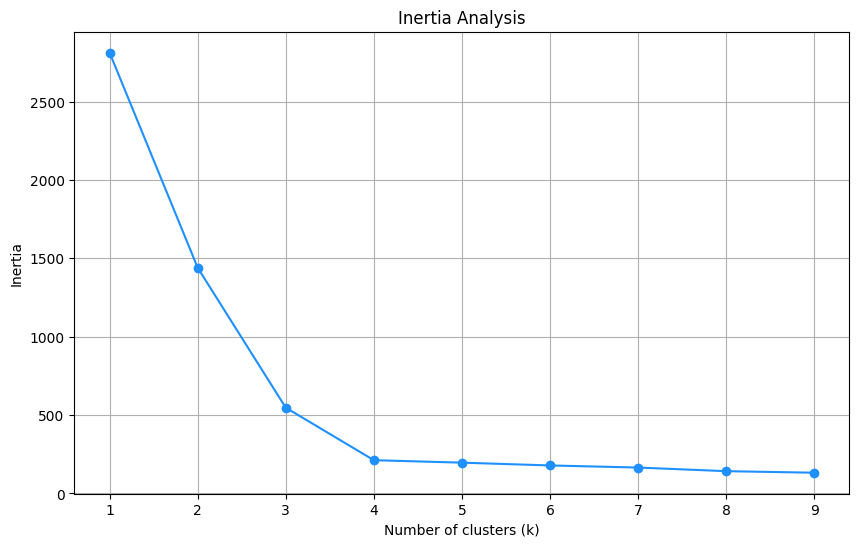

In [22]:
# Calculate inertia
inertia = kmeans.inertia_
print(f"Inerzia: {inertia}")

# Calculate inertia values for k from 1 to 10
inertia_values = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Show plot of inertia values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values,color=color_blue_light, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia Analysis')
plt.grid()
plt.show()


In [17]:
# Assign labels to each point in the dataset
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


For k=2, silhouette score: 0.4547
For k=3, silhouette score: 0.5890
For k=4, silhouette score: 0.6820
For k=5, silhouette score: 0.5824
For k=6, silhouette score: 0.4853
For k=7, silhouette score: 0.4966
For k=8, silhouette score: 0.4044
For k=9, silhouette score: 0.3987


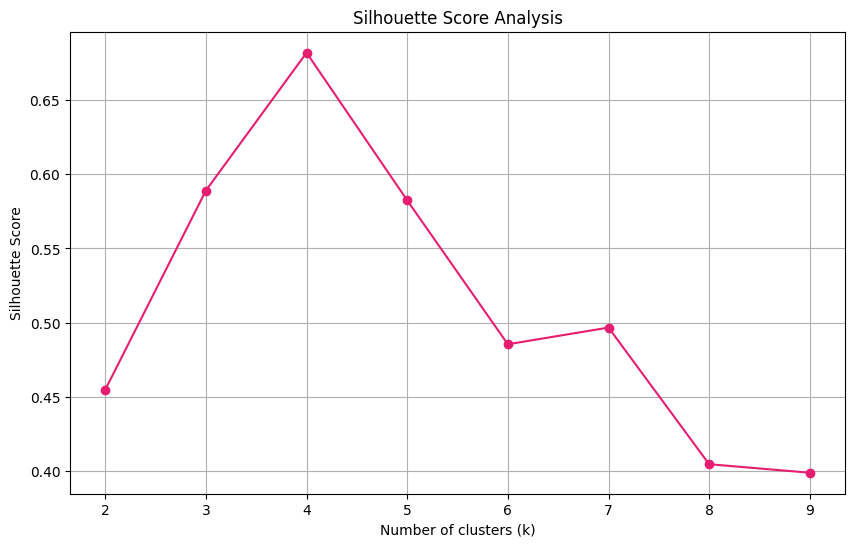

In [18]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for different values of k
silhouette_scores = []
k_values = range(2, 10)  # Silhouette score requires at least 2 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"For k={k}, silhouette score: {score:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, color=color_pink, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.grid(True)
plt.show()